# **Architecture Styles** 🏢


---



# Data Gathering

In [ ]:
!git clone https://github.com/KabirAhmad4/CNN-on-Architecture-styles.git

Cloning into 'CNN-on-Architecture-styles'...
remote: Enumerating objects: 1192, done.
remote: Total 1192 (delta 0), reused 0 (delta 0), pack-reused 1192
Receiving objects: 100% (1192/1192), 197.42 MiB | 19.50 MiB/s, done.
Resolving deltas: 100% (1/1), done.
Updating files: 100% (1229/1229), done.


In [ ]:
cd /content/CNN-on-Architecture-styles

/content/CNN-on-Architecture-styles


# Import Libraries

In [ ]:
import os
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import shutil
import random
import matplotlib.pyplot as plt

# Test Data Separation

In [ ]:
# Function to create subfolders in the test directory matching the structure of the train directory
def create_test_subfolders(train_directory, test_directory):
    for root, dirs, _ in os.walk(train_directory):
        for dir_name in dirs:
            os.makedirs(os.path.join(test_directory, root[len(train_directory):], dir_name), exist_ok=True)

# Function to move a portion of data from train directory to test directory maintaining folder structure
def create_test_data(train_directory, test_directory, test_ratio=0.02):
    # Create subfolders in test directory matching the structure of train directory
    create_test_subfolders(train_directory, test_directory)

    # Iterate over the train directory to move files to test directory
    for root, _, files in os.walk(train_directory):
        for file_name in files:
            # Decide randomly whether to move the file to the test directory
            if random.random() < test_ratio:
                source = os.path.join(root, file_name)
                # Fix: Join the test_directory with the relative path
                destination = os.path.join(test_directory, root[len(train_directory) + 1:], file_name)
                shutil.move(source, destination)

# Path to your original training data directory
original_train_directory = "/content/CNN-on-Architecture-styles/21st_Century"

# Path to the new test data directory to be created
test_directory = "/content/sample_data" # Creating a subfolder for test data

# Create test data with same subfolder structure as train data
create_test_data(original_train_directory, test_directory, test_ratio=0.02)

In [ ]:
# Paths to your train and test directories
train_directory = original_train_directory
test_directory = test_directory


# Visualization Of Data

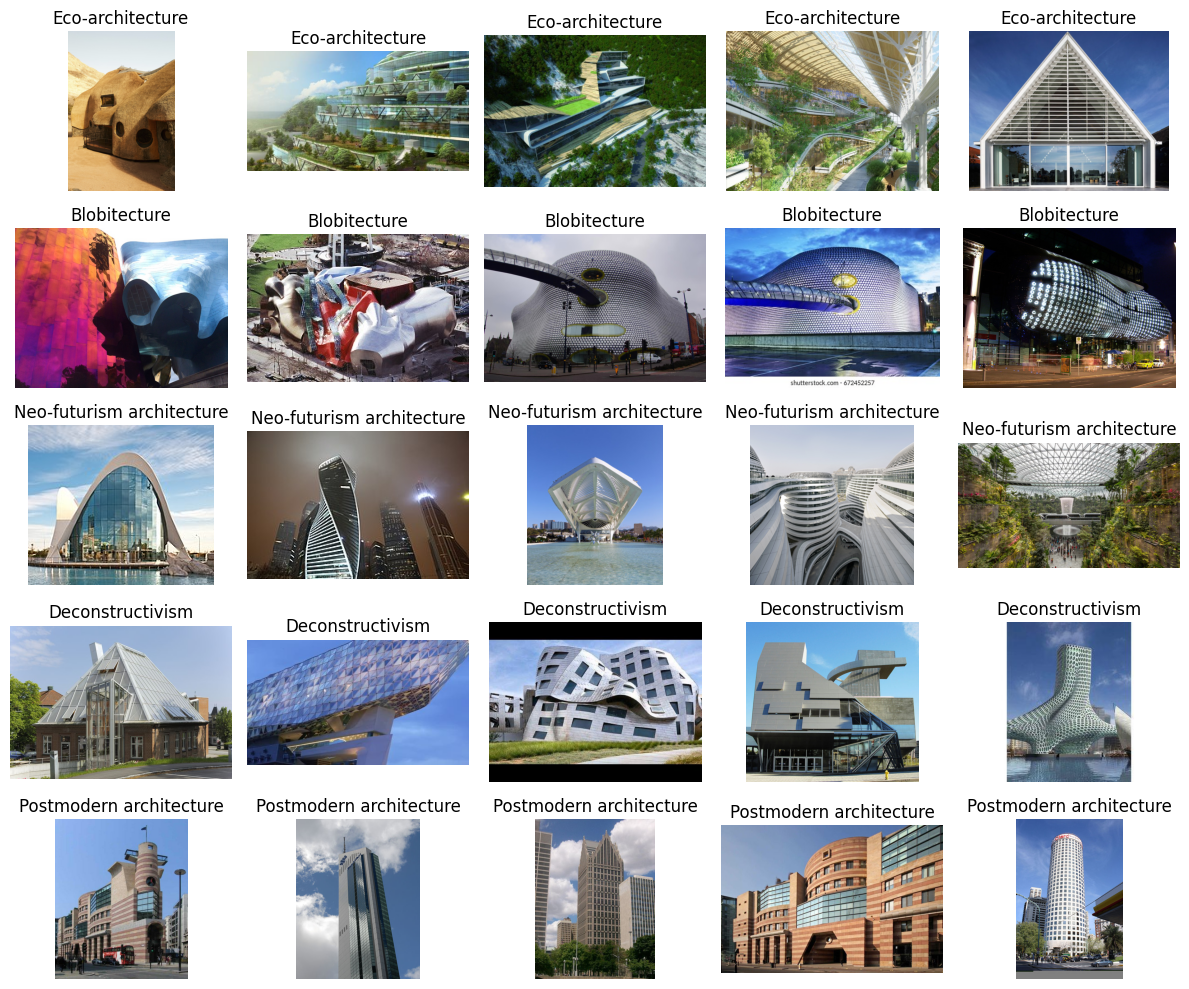

In [ ]:
# Define the number of classes
num_classes = 5

# Define the number of images to plot per class
images_per_class = 5

# Get the class names
class_names = os.listdir(train_directory)

# Create a figure with subplots
fig, axes = plt.subplots(num_classes, images_per_class, figsize=(12, 10))

# Iterate over each class
for i in range(num_classes):
  # Get the images for the current class
  images = os.listdir(os.path.join(train_directory, class_names[i]))

  # Select the first `images_per_class` images
  selected_images = images[:images_per_class]

  # Iterate over each selected image
  for j in range(images_per_class):
    # Load the image
    image = plt.imread(os.path.join(train_directory, class_names[i], selected_images[j]))

    # Display the image on the corresponding subplot
    axes[i, j].imshow(image)
    axes[i, j].axis('off')

    # Add the class name as a title
    axes[i, j].set_title(class_names[i])

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


# Data generation for train and test data

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    train_directory,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    test_directory,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical')


Found 1202 images belonging to 5 classes.
Found 27 images belonging to 5 classes.


#  Building CNN MODEL

In [ ]:
# Define CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(5, activation='softmax')  # changed to softmax and num_classes needs to be defined
])

# Model Compilation

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])  # changed to categorical_crossentropy

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

# Training the Model

In [ ]:
# Train the model
history = model.fit(train_generator, epochs=50)

Epoch 1/50
38/38 [==============================] - 15s 237ms/step - loss: 1.5938 - accuracy: 0.2329
Epoch 2/50
38/38 [==============================] - 8s 216ms/step - loss: 1.5551 - accuracy: 0.2704
Epoch 3/50
38/38 [==============================] - 9s 239ms/step - loss: 1.4688 - accuracy: 0.3536
Epoch 4/50
38/38 [==============================] - 9s 229ms/step - loss: 1.3822 - accuracy: 0.4085
Epoch 5/50
38/38 [==============================] - 8s 210ms/step - loss: 1.2844 - accuracy: 0.4784
Epoch 6/50
38/38 [==============================] - 9s 238ms/step - loss: 1.2109 - accuracy: 0.5017
Epoch 7/50
38/38 [==============================] - 9s 240ms/step - loss: 1.1610 - accuracy: 0.5349
Epoch 8/50
38/38 [==============================] - 8s 209ms/step - loss: 1.0606 - accuracy: 0.5699
Epoch 9/50
38/38 [==============================] - 9s 235ms/step - loss: 0.9483 - accuracy: 0.6331
Epoch 10/50
38/38 [==============================] - 9s 235ms/step - loss: 0.8251 - accuracy: 0.673

# Model Evaluation

In [ ]:
# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test accuracy: {test_accuracy}')

1/1 [==============================] - 1s 768ms/step - loss: 4.1444 - accuracy: 0.5385
Test accuracy: 0.5384615659713745


# Model Prediction

1/1 [==============================] - 1s 588ms/step
Predicted class: Blobitecture


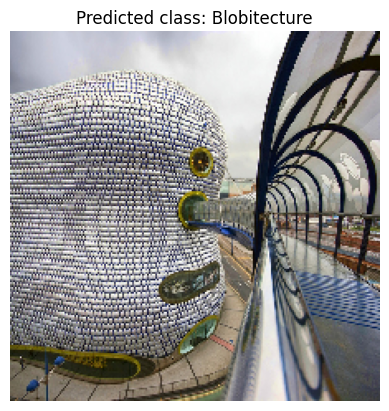

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt


# Function to load and preprocess an image
def load_and_preprocess_image(img_path, target_size=(150, 150)):
    # Load the image
    img = image.load_img(img_path, target_size=target_size)
    # Convert the image to a numpy array
    img_array = image.img_to_array(img)
    # Expand dimensions to match the input shape of the model (batch size, height, width, channels)
    img_array = np.expand_dims(img_array, axis=0)
    # Normalize the image array
    img_array = img_array / 255.0
    return img_array

# Function to predict the class of an image
def predict_image_class(model, img_path, class_indices):
    # Preprocess the image
    preprocessed_img = load_and_preprocess_image(img_path)
    # Make a prediction
    prediction = model.predict(preprocessed_img)
    # Find the index of the highest probability
    predicted_class_index = np.argmax(prediction, axis=1)[0]
    # Map the index to the class label
    class_labels = {v: k for k, v in class_indices.items()}
    predicted_class_label = class_labels[predicted_class_index]
    return predicted_class_label, prediction

# Path to the image you want to predict
img_path = "/content/CNN-on-Architecture-styles/21st_Century/Blobitecture/000.jpg"  # Replace with your image path

# Get the class indices from the training generator to map prediction indices to class labels
class_indices = train_generator.class_indices

# Predict the class
predicted_label, prediction_probabilities = predict_image_class(model, img_path, class_indices)

print(f"Predicted class: {predicted_label}")

# Optionally, display the image
img = image.load_img(img_path, target_size=(224, 224))
plt.imshow(img)
plt.title(f"Predicted class: {predicted_label}")
plt.axis('off')
plt.show()
